# PROJECT : 2016 US Bike Share Analysis

## Table of Contents
- Introduction
- Posing Questions
- Data Collection and Wrangling
  - Condensing the Trip Data
- Exploratory Data Analysis
  - Statistics
  - Visualizations
- Performing Your Own Analysis
- Conclusions

<a id='intro'></a>
## Introduction


Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States was carried out and the system usage between three large cities: New York City, Chicago, and Washington, DC is compared. And also differences within each system for those users that are registered, regular users and those users that are short-term, casual users was also seen.

<a id='pose_questions'></a>
## Posing Questions

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: 
        1. How the number of riders vary in a year(months), week(days) and in a day(hours).
        2. How the user-types vary within a week?
        3. HOw the average duration changes in a week and between user-type.

<a id='wrangling'></a>
## Data Collection and Wrangling

This project, focused on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where the trip data is downloaded and provided. Some data wrangling of inconsistencies in timestamp format within each city has already been performed . In addition, a random 2% sample of the original data is taken to make the exploration more manageable.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)
 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

In [1]:
import csv
from datetime import datetime
from pprint import pprint 

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        trip_reader = csv.DictReader(f_in)
        first_trip = next(trip_reader)
        pprint(first_trip)

    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

<a id='condensing'></a>
### Condensing the Trip Data


New data files are generated with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. 
- **User Type**: Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    Reference: https://docs.python.org/3/library/functions.html
    """
    
    if city == 'NYC':
        t = float(datum['tripduration'])
        duration = t/60
    if city == 'Chicago':
        t = float(datum['tripduration'])
        duration = t/60
    if city  == 'Washington':
        t = float(datum['Duration (ms)'])
        duration = t/60000
    return duration

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    Reference: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    if city == 'NYC':
        d = datetime.strptime(datum['starttime'], "%m/%d/%Y %H:%M:%S")
        month = int(datetime.strftime(d, "%m"))
        hour = int(datetime.strftime(d, "%H"))
        day_of_week = datetime.strftime(d, "%A")
    if city == 'Chicago':
        d = datetime.strptime(datum['starttime'], "%m/%d/%Y %H:%M")
        month = int(datetime.strftime(d, "%m"))
        hour = int(datetime.strftime(d, "%H"))
        day_of_week = datetime.strftime(d, "%A")
    if city == 'Washington':
        d = datetime.strptime(datum['Start date'], "%m/%d/%Y %H:%M")
        month = int(datetime.strftime(d, "%m"))
        hour = int(datetime.strftime(d, "%H"))
        day_of_week = datetime.strftime(d, "%A")
    
    return (month, hour, day_of_week)

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    """
    if city == 'NYC':
        user_type = datum['usertype']
    if city == 'Chicago':
        user_type = datum['usertype']
    if city == 'Washington':
        user = datum['Member Type']
        if user == 'Registered':
            user_type = user.replace('Registered', 'Subscriber')
        else:
            user_type = user.replace('Casual', 'Customer')
    
    return user_type

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    Reference: https://docs.python.org/3/library/csv.html#writer-objects
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            month, hour, day_of_week = time_of_trip(row, city)
            new_point = {}
            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'] = month
            new_point['hour'] = hour
            new_point['day_of_week'] = day_of_week
            new_point['user_type'] = type_of_user(row, city)
            
            trip_writer.writerow(new_point)

In [7]:
"""Condensing the data."""
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


<a id='eda'></a>
## Exploratory Data Analysis

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 
            1. The city with highest portion of trips made by Subscribers is NYC.
            2. The city with highest portion of trips made by Customers is Chicago.
            3. The city with highest number of trips is NYC.

In [8]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
    
        n_subscribers = 0
        n_customers = 0
        
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        n_total = n_subscribers + n_customers
        
        return(n_subscribers, n_customers, n_total)

In [9]:
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

"""Calls the function number_of_trips 
and stores the respective inforamtion in dict: trips{}
"""
trips = {}
for city, filenames in city_info.items():
    subs, cus, tot = number_of_trips(filenames['out_file'])
    trips[city] = {}
    trips[city]['Subscribers'] = subs
    trips[city]['Customers'] = cus
    trips[city]['Total'] = tot
for city, values in trips.items():
    trips[city]['Subscriber_Portion'] = values['Subscribers']/values['Total']
    trips[city]['Customer_Portion'] = values['Customers']/values['Total']

"""Extracts the requires values Total, Subscribers portion and Customer portion
and stores them in seperate lists."""
Subscribers_Portion = []
Customers_Portion = []
Total = []
for c in trips:
    Subscribers_Portion.append(trips[c]['Subscriber_Portion'])
    Customers_Portion.append(trips[c]['Customer_Portion'])
    Total.append(trips[c]['Total'])
    
"""Uses the lists created above to print respective city"""
for city, s in trips.items():
    if max(Subscribers_Portion) == s['Subscriber_Portion']:
        print('The city with highest portion of trips made by Subscribers is {}'.format(city))
for city, s in trips.items():
    if max(Customers_Portion) == s['Customer_Portion']:
        print('The city with highest portion of trips made by Customers is {}'.format(city))
for city, s in trips.items():
    if max(Total) == s['Total']:
        print('The city with highest number of trips is {}'.format(city))

The city with highest portion of trips made by Subscribers is NYC
The city with highest portion of trips made by Customers is Chicago
The city with highest number of trips is NYC


**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 
            1. Average trip length of Washington is 18.93287355913721 and portion of trips greater than 30minutes is 10.84%.
            2. Average trip length of Chicago is 16.563629368787335 and portion of trips greater than 30minutes is 8.33%.
            3. Average trip length of NYC is 15.81259299802294 and portion of trips greater than 30minutes is 7.30%.

In [10]:
def convert_float(file):
    """
    Takes the file as arugument and converts duration column into float 
    and retunrs the converted column as list.
    
    """
    float_values = []
    for a in file:
        float_values.append(float(a['duration']))
    return float_values

In [11]:
for city, filenames in city_info.items():
    """
    For each file(Washington, Chicago, NYC) calculate average trip length 
    and portionof trips greater tan 30 minutes.
    
    """
    with open(filenames['out_file'], 'r') as f_avgtime:
        avg_time = csv.DictReader(f_avgtime)
        ans = convert_float(avg_time)
        average = sum(ans)/len(ans)
        print('Average trip length of {} is {}'.format(city, average))
        n_longer = 0
        for i in ans:
            if i > 30:
                n_longer += 1
        trips_longer = n_longer/trips[city]['Total']
        print('Portion of trips greater than 30minutes in {} is {}%'.format(city, (trips_longer)*100))

Average trip length of Washington is 18.93287355913721
Portion of trips greater than 30minutes in Washington is 10.83888671109369%
Average trip length of Chicago is 16.563629368787335
Portion of trips greater than 30minutes in Chicago is 8.332062497400562%
Average trip length of NYC is 15.81259299802294
Portion of trips greater than 30minutes in NYC is 7.3024371563378345%


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: Interestingly, Customers taks longer rides in every city.
            1. Customers take longer rides on average in Washington.
            2. Customers take longer rides on average in Chicago.
            3. Customers take longer rides on average in NYC.

In [12]:
def convert_float_ridership(file):
    """
    Converts the duration column into float group them by user-type.
    
    """
    float_values_Subscriber = []
    float_values_Customer = []
    for a in file:
        if a['user_type'] == 'Subscriber':
            float_values_Subscriber.append(float(a['duration']))
        else:
            float_values_Customer.append(float(a['duration']))
    return (float_values_Subscriber, float_values_Customer)

for city, filenames in city_info.items():
    """
    Prints which user-type takes longer rides in each city.
    
    """
    with open(filenames['out_file'], 'r') as f_ridership:
        ridership = csv.DictReader(f_ridership)
        Subscriber_ridership, Customer_ridership = convert_float_ridership(ridership)
        ans1 = sum(Subscriber_ridership)/len(Subscriber_ridership)
        ans2 = sum(Customer_ridership)/len(Customer_ridership)
        if ans1 > ans2:
            print('Subscribers take longer rides on average in {}'.format(city))
        else:
            print('Customers take longer rides on average in {}'.format(city))

Customers take longer rides on average in Washington
Customers take longer rides on average in Chicago
Customers take longer rides on average in NYC


<a id='visualizations'></a>
### Visualizations

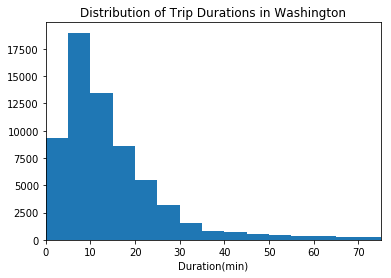

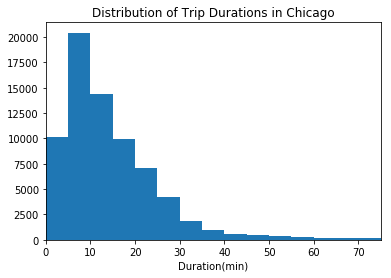

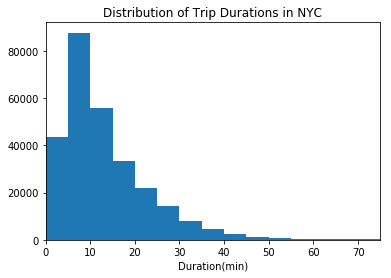

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
for city, filenames in city_info.items():
    """
    Plots histograms for trip durations for each city.
    
    """
    with open(filenames['out_file'], 'r') as f_plot:
        plot = csv.DictReader(f_plot)
        ans = convert_float(plot)
        plt.hist(ans, bins = range(0, 80, 5))
        plt.xlim(0,75)
        plt.title('Distribution of Trip Durations in {}'.format(city))
        plt.xlabel('Duration(min)')
        plt.show()

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: Surprisingly, trip durations of Customers is high compared to Subscribers. The histograms of all the cites for both Sunbscribers and Customers are **skewed right**.
         1. The histogram for cities NYC and Chicago for user-type 'Subscribers' and for user-type 'Customers' is unimodel     distribution around 5-10 minutes and 20-25 minutes respectively and are right skewed.
         2. The histogram for the city Washington for user-type 'Subscribers' and for user-type 'Customers' is unimodel      distribution around 5-10 minutes and 15-20 minutes respectively and are right skewed.


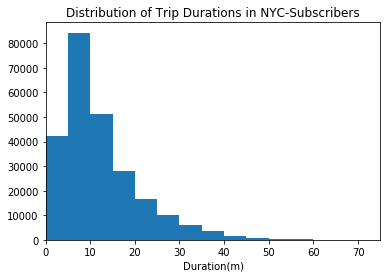

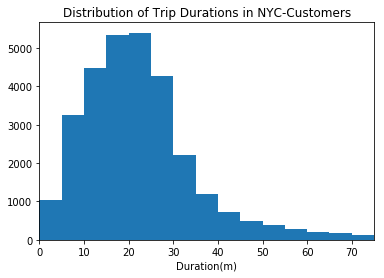

In [17]:
"""Plots histograms for the selected city for each user-type."""

with open(city_info['NYC']['out_file'], 'r') as f_ridership:
        ridership = csv.DictReader(f_ridership)
        Subscriber_ridership, Customer_ridership = convert_float_ridership(ridership)
        plt.hist(Subscriber_ridership, bins = range(0, 80, 5))
        plt.xlim(0,75)
        plt.title('Distribution of Trip Durations in NYC-Subscribers')
        plt.xlabel('Duration(m)')
        plt.show()
        plt.hist(Customer_ridership, bins = range(0, 80, 5))
        plt.xlim(0,75)
        plt.title('Distribution of Trip Durations in NYC-Customers')
        plt.xlabel('Duration(m)')
        plt.show()

<a id='eda_continued'></a>
## Performing Your Own Analysis

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: <br/>
a. Variation of riders with month. 
        1. For all the cities the histograms are skewed to the right with maximum peaks at July and August in Washington, August in Chicago and September in NYC. 

In [15]:
def convert_float_month(file):
    """
    Converts the month column of the given file into floats.
    
    """
    float_values = []
    for a in file:
        float_values.append(float(a['month']))
    return float_values
def convert_float_ridership_month(file):
    """
    Converts the month column into float group them by user-type.
    
    """
    float_values_Subscriber = []
    float_values_Customer = []
    for a in file:
        if a['user_type'] == 'Subscriber':
            float_values_Subscriber.append(float(a['month']))
        else:
            float_values_Customer.append(float(a['month']))
    return (float_values_Subscriber, float_values_Customer)

def users(tuples):
    """
    Takes the first set of tuple and append them into list.
    
    """
    ar = []
    for i in tuples[0]:
        ar.append(i)
    return ar
def ratio_of_users(list1, list2):
    """
    Calculates the ratio of given two lists.
    
    """
    user = []
    i = 0
    while i < len(list1):
        user.append(list1[i] / list2[i])
        i += 1
    return user 

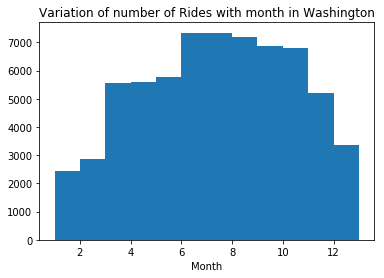

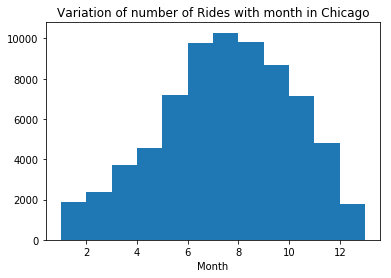

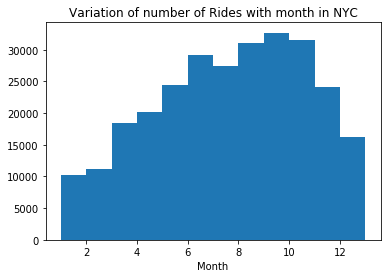

In [16]:
%matplotlib inline
for city, filenames in city_info.items():
    """For each city plots histogram of number of rides in a month."""
    with open(filenames['out_file'], 'r') as f_month:
        mnth = csv.DictReader(f_month)
        ans = convert_float_month(mnth)
        plt.hist(ans, bins = range(1, 14))
        plt.title('Variation of number of Rides with month in {}'.format(city))
        plt.xlabel('Month')
        plt.show()

**Answer**: b. Variation of Ratio of usertype(Subscribers/Customers) with month. 
        1. The Subscribers rides are maximum at ends(January and December) and decreases to minimum in the middle(July) for both Washington and Chicago. But for NYC though the minimum in July there is a anamoly in June.

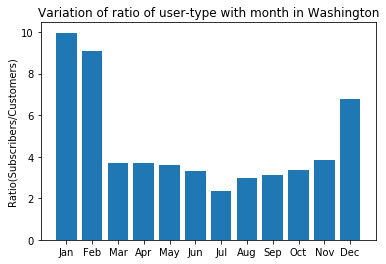

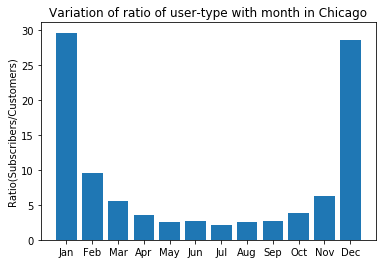

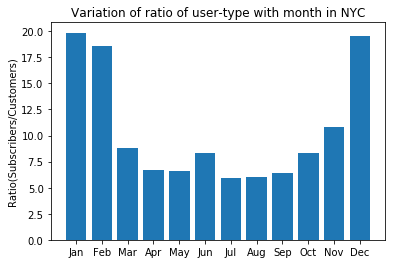

In [17]:
for city, filenames in city_info.items():
    """
    Plots bar graph of variation of ratio of user-type Subscribers and Customers with month.
    
    """
    with open(filenames['out_file'], 'r') as f_month:
        mt = csv.DictReader(f_month)
        ans1, ans2 = convert_float_ridership_month(mt)
        ans1_h = plt.hist(ans1, bins = range(1, 14))
        plt.close();
        ans2_h = plt.hist(ans2, bins = range(1, 14))
        plt.close();
        Subs = users(ans1_h)
        Cus = users(ans2_h)
        Ratio = ratio_of_users(Subs, Cus)
        location = range(1, 13)
        xlabel = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        plt.bar(location, Ratio)
        plt.title('Variation of ratio of user-type with month in {}'.format(city))
        plt.xticks(location, xlabel)
        plt.ylabel('Ratio(Subscribers/Customers)')
        plt.show()

**Answer**:
c. Variation of number of rides with days. 
                1. Total number of rides increased from monday to its peak in mid of week and decreased to minimum during             weekends.

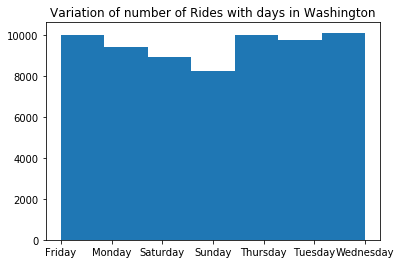

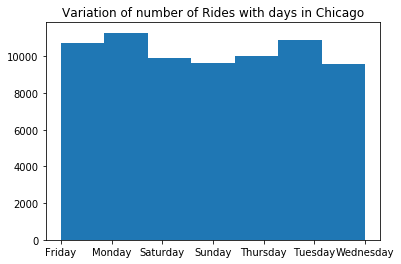

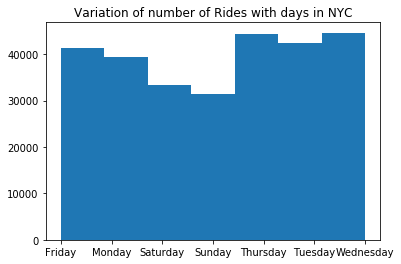

In [18]:
def day_of_week(file):
    """
    Returns a list of column day_of_week.
    
    """
    days = []
    for a in file:
        days.append(a['day_of_week'])
    return days

for city, filenames in city_info.items():
    """
    Plots histogram of number of riders in each day of the week.
    
    """
    with open(filenames['out_file'], 'r') as f_week:
        wk = csv.DictReader(f_week)
        week = day_of_week(wk)
        plt.hist(week, bins = 7)
        plt.title('Variation of number of Rides with days in {}'.format(city))
        plt.show()

**Answer**: d. Variation of number of rides for different user-type with days. 
            1. For Subcribers the number of rides increases to maximum during mid week and decreases to minimum during
            weekends. But for Customers during weekends the number of rides are maximum while there is no significant change
            during weekdays.

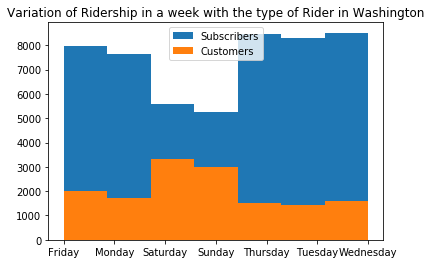

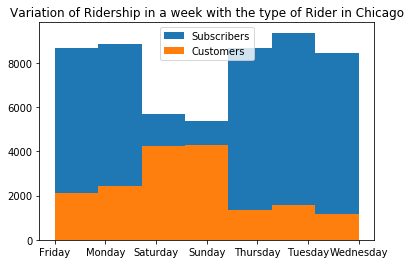

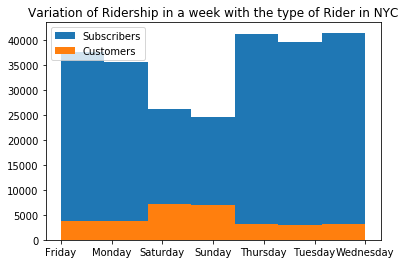

In [19]:
def day_of_week_usertype(file):
    """
    Returns two seperate lists of day_of_week specific to user-type.
    
    """
    Subscriber = []
    Customer = []
    for a in file:
        if a['user_type'] == 'Subscriber':
            Subscriber.append(a['day_of_week'])
        else:
            Customer.append(a['day_of_week'])
    return (Subscriber, Customer)


for city, filenames in city_info.items():
    """
    Plots histogram and shows camparision of number of riders in each day of the week with user-type.
    
    """
    with open(filenames['out_file'], 'r') as f_week_type:
        wk_type = csv.DictReader(f_week_type)
        week_type_Subs, week_type_Cus = day_of_week_usertype(wk_type)
        plt.hist(week_type_Subs, bins = 7, label = 'Subscribers')
        plt.hist(week_type_Cus, bins = 7, label = 'Customers')
        plt.title('Variation of Ridership in a week with the type of Rider in {}'.format(city))
        plt.legend()
        plt.show()

**Answer**:
e. Variation of Average duration of rides with days. 
        1. In all the three cities the average duration of rides is maximum during weekends while there is hardly any change during weekdays.

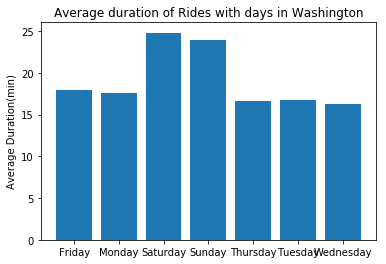

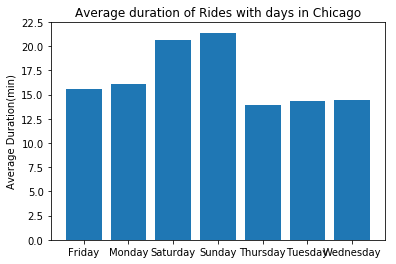

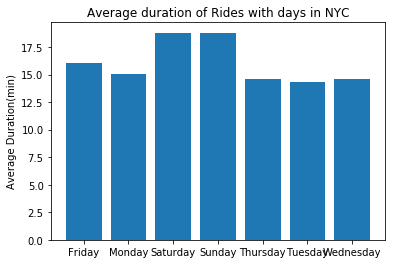

In [20]:
def convert_float_dow(file, day):
    """
    Converts the duration column in file to float if it matches with the given day.
    
    """
    float_values = []
    for a in file:
        if a['day_of_week'] == day:
            float_values.append(float(a['duration']))
    return float_values

for city, filenames in city_info.items():
    """
    PLots bar graph of Average duration against days for each city.
    
    """
    with open(filenames['out_file'], 'r') as f_dow:
        dur_dow = csv.DictReader(f_dow)
        duration_day = []
        dow = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
        i = 0
        while i < len(dow):
            avg_duration_day = convert_float_dow(dur_dow, dow[i])
            i += 1
            average = sum(avg_duration_day)/len(avg_duration_day)
            duration_day.append(average)
            f_dow.seek(0)
        plt.bar(dow, duration_day)
        plt.title('Average duration of Rides with days in {}'.format(city))
        plt.ylabel('Average Duration(min)')
        plt.show()

**Answer**: f. Variation of Total number of rides in a day. 
        1. There are two peaks for all the three cities. One peak in morning at around 9hrs and second peak(maximum) in the evening at around 17hrs.

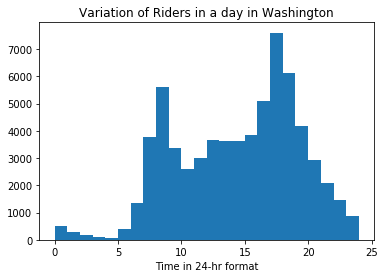

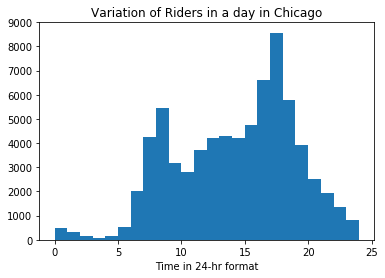

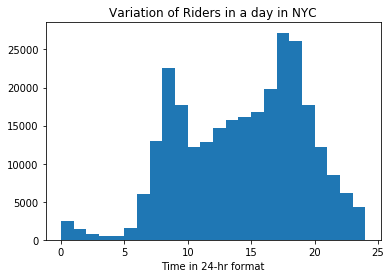

In [21]:
def convert_float_hour(file):
    """
    Converts hour column into floats for the given file.
    
    """
    float_values = []
    for a in file:
        float_values.append(float(a['hour']))
    return float_values

for city, filenames in city_info.items():
    """
    Plots histogram of variation of riders within a day by hour.
    
    """
    with open(filenames['out_file'], 'r') as f_hour:
        hour_time = csv.DictReader(f_hour)
        ans = convert_float_hour(hour_time)
        plt.hist(ans, bins = range(25))
        plt.title('Variation of Riders in a day in {}'.format(city))
        plt.xlabel('Time in 24-hr format')
        plt.show()

**Answers**: g. Variation of riders in a day with user-type. 
        1. For Subscribers there are two peaks for all the three cities. One peak in morning at around 9hrs and second peak(maximum) in the evening at around 17hrs.
        1. For customers, contrast to Subscribers the histogram is a left skewed distribution with peak at around 15hrs.

Washington


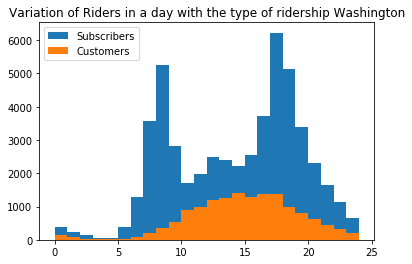

Chicago


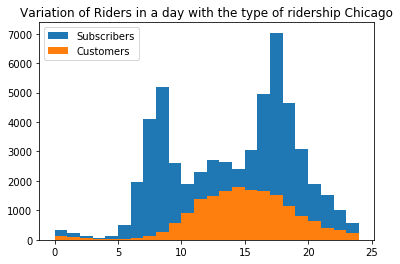

NYC


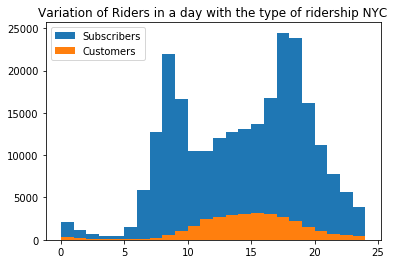

In [22]:
def convert_float_ridership_hour_user(file):
    """
    Coverts hour column into floats by usertype specific.
    
    """
    float_values_Subscriber = []
    float_values_Customer = []
    for a in file:
        if a['user_type'] == 'Subscriber':
            float_values_Subscriber.append(float(a['hour']))
        else:
            float_values_Customer.append(float(a['hour']))
    return (float_values_Subscriber, float_values_Customer)



for city, filenames in city_info.items():
    """
    Plots histogram and compare the variation of riders within a day by hour.
    
    """
    with open(filenames['out_file'], 'r') as f_hour_user:
        hour_time_user = csv.DictReader(f_hour_user)
        ans1, ans2 = convert_float_ridership_hour_user(hour_time_user)
        print('{}'.format(city))
        plt.hist(ans1, bins = range(25), label = 'Subscribers')
        plt.hist(ans2, bins = range(25), label = 'Customers')
        plt.title('Variation of Riders in a day with the type of ridership {}'.format(city))
        plt.legend()          
        plt.show()

<a id='conclusions'></a>
## Conclusions

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: The techniques of data science can be apllied for any industry or company irrespective of the size of company. One such topic is banking sector. We can isolate the branch and see what type of products interesting the customers in that area. We can also how the balance in their savings account vary in a year. At which time of year they are spending more and withe credit card transactions the bank can give personal offers to its customers. We can also see the trend like inactivity of internet login or inactivity in use of credit card of a customer prior leaving the bank and give him/her exciting offers in order to retain him. We can also see how different age groups and genders differ in spending or leaving the bank or number of credit cards. If one asks the right data, the applications of data science are innumerable. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])